# 1. Install dependencies before reproducing results

In [1]:
# !pip install -r requirements.txt

# 2. Exploratory Data Analysis

## 2.1 Import and Clean Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib_venn import venn2
from PIL import Image

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# import data from .csv file
ori_df = pd.read_csv("6M-0K-99K.users.dataset.public.csv")
ori_df.shape

(98913, 24)

In [4]:
# summary of data
ori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [5]:
# No missing data found
ori_df.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

In [6]:
# Make a copy from original dataset
df = ori_df.copy()

# Removing duplicated covariates from imported data
varToDrop = ['identifierHash','type','country','civilityGenderId','seniority','seniorityAsMonths']
df.drop(varToDrop, axis=1, inplace=True)

# Reordering columns
df = df[['countryCode','language','gender','civilityTitle','socialNbFollowers','socialNbFollows','socialProductsLiked','productsListed','productsWished','productsSold', 
         'productsPassRate','productsBought','hasAnyApp','hasAndroidApp','hasIosApp','hasProfilePicture','daysSinceLastLogin','seniorityAsYears']]

# describe data
df.describe()

,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsWished,productsSold,productsPassRate,productsBought,daysSinceLastLogin,seniorityAsYears
count,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,3.432269,8.425677,4.420743,0.093304,1.562595,0.121592,0.812303,0.171929,655.732310,8.510424
std,3.882383,52.839572,181.030569,2.050144,25.192793,2.126895,8.500205,2.332266,7407.430369,0.467863
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,7.920000
25%,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,572.000000,7.940000
50%,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,694.000000,8.880000
75%,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,702.000000,8.890000
max,744.000000,13764.000000,51671.000000,244.000000,2635.000000,174.000000,100.000000,405.000000,737028.000000,8.900000


## 2.2 Identifying and Removing Outliers

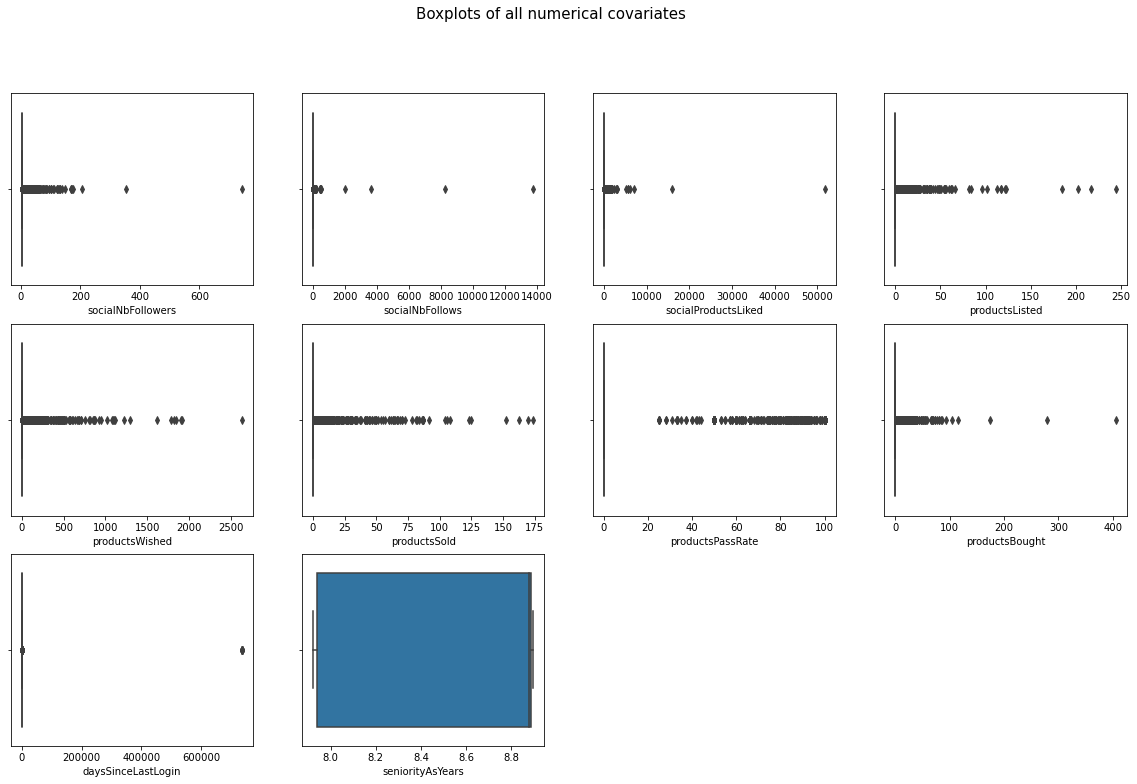

In [7]:
# boxplots for all numerical covariates
FIG = plt.figure(figsize=(20, 12))
plt.suptitle('Boxplots of all numerical covariates', fontsize=15)
FIG.add_subplot(341)
sns.boxplot(x='socialNbFollowers', data=df)
FIG.add_subplot(342)
sns.boxplot(x='socialNbFollows', data=df)
FIG.add_subplot(343)
sns.boxplot(x='socialProductsLiked', data=df)
FIG.add_subplot(344)
sns.boxplot(x='productsListed', data=df)
FIG.add_subplot(345)
sns.boxplot(x='productsWished', data=df)
FIG.add_subplot(346)
sns.boxplot(x='productsSold', data=df)
FIG.add_subplot(347)
sns.boxplot(x='productsPassRate', data=df)
FIG.add_subplot(348)
sns.boxplot(x='productsBought', data=df)
FIG.add_subplot(349)
sns.boxplot(x='daysSinceLastLogin', data=df)
FIG.add_subplot(3,4,10)
sns.boxplot(x='seniorityAsYears', data=df)
plt.show()

`daysSinceLastLogin` is the only covariate which has an unordinary skewness from the boxplots, with an outlier above 600000 days. Sorting the dataframe by `daysSinceLastLogin` at a descending order below shows that there must be an error with the data hence we should remove it.  

In [8]:
df.sort_values(by='daysSinceLastLogin',ascending=False).head(15)

,countryCode,language,gender,civilityTitle,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsWished,productsSold,productsPassRate,productsBought,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniorityAsYears
89086,au,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89093,gb,en,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,737028,7.92
89084,us,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89089,us,en,F,mrs,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89083,au,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89088,es,es,F,mrs,3,8,0,0,0,0,0.0,0,True,True,False,True,737028,7.92
87544,se,en,F,mrs,3,8,0,0,0,0,0.0,0,True,False,True,True,737028,7.92
89090,us,en,M,mr,3,8,0,0,0,0,0.0,0,False,False,False,True,737028,7.92
89091,gb,en,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,737028,7.92
89087,it,it,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,737028,7.92


In [9]:
# Remove outlier data found from 'daysSinceLastLogin' covariate
df_clean = df[df['daysSinceLastLogin'] != 737028]

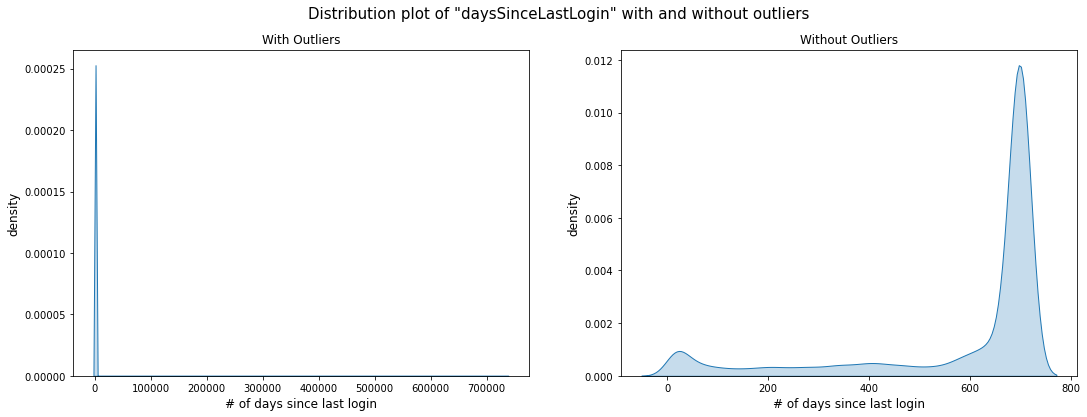

In [10]:
# visualizing distribution of 'daysSinceLastLogin' before and after removing outliers
FIG = plt.figure(figsize=(18, 6))
plt.suptitle('Distribution plot of "daysSinceLastLogin" with and without outliers', fontsize=15)

FIG.add_subplot(121)
plt.xlabel("# of days since last login", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.title("With Outliers")
sns.kdeplot(np.array(df['daysSinceLastLogin']), shade=True)

FIG.add_subplot(122)
plt.xlabel("# of days since last login", fontsize=12)
plt.ylabel("density", fontsize=12)
plt.title("Without Outliers")
sns.kdeplot(np.array(df_clean['daysSinceLastLogin']), shade=True)
plt.show()

The plots above shows the distribution of `daysSinceLastLogin` before and after removing the outliers. We can see from the right distribution plot that majority users have dropped out. 

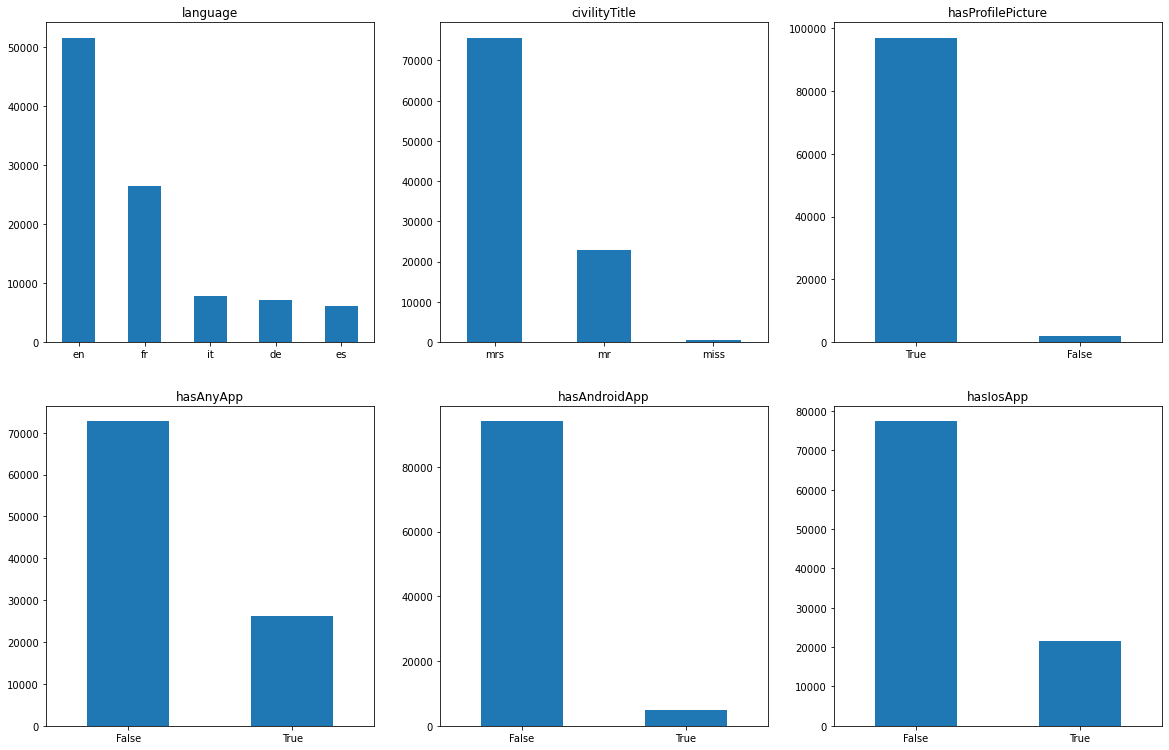

In [11]:
# visualizing the count of categorical variables
FIG = plt.figure(figsize=(20, 20))

FIG.add_subplot(331)
df_clean['language'].value_counts().plot(kind='bar', title='language')
plt.xticks(rotation=0)
FIG.add_subplot(332)
df_clean['civilityTitle'].value_counts().plot(kind='bar', title='civilityTitle')
plt.xticks(rotation=0)
FIG.add_subplot(333)
df_clean['hasProfilePicture'].value_counts().plot(kind='bar', title='hasProfilePicture')
plt.xticks(rotation=0)
FIG.add_subplot(334)
df_clean['hasAnyApp'].value_counts().plot(kind='bar', title='hasAnyApp')
plt.xticks(rotation=0)
FIG.add_subplot(335)
df_clean['hasAndroidApp'].value_counts().plot(kind='bar', title='hasAndroidApp')
plt.xticks(rotation=0)
FIG.add_subplot(336)
df_clean['hasIosApp'].value_counts().plot(kind='bar', title='hasIosApp')
plt.xticks(rotation=0)
plt.show()

Overview characteristics of users based on the plots above:
1. Prefer english language
2. Married females
3. Engages with social network feature
4. Never used company's official application - access via website

## 2.3 Segmentation of Users

User Active Status Condition: Users are considered active if `daysSinceLastLogin` variable is less than 6 months (~180 days)

Segmentation of Active and Inactive Users:
1. Buyers
2. Seller
3. Buyers and Sellers
4. Non-Buyers and Non-Sellers

Note: Buyers and Sellers groups are not mutually exclusive, there will be users that are both buyers and sellers, or neither

In [12]:
# segment users using 'productsBought', 'productsSold' and 'daysSinceLastLogin' variables
df_final = df_clean.copy()
df_final.loc[df_final['productsBought'] > 0 , 'buyer'] = 1
df_final.loc[df_final['productsSold'] > 0 , 'seller'] = 1
df_final['buyer'] = df_final['buyer'].replace(np.nan,0).apply(int)
df_final['seller'] = df_final['seller'].replace(np.nan,0).apply(int)

def cond_neither(df):
    if (df['buyer'] == 0) and (df['seller'] == 0):
        return 1
    else:
        return 0
        
def cond_both(df):
    if (df['buyer'] == 1) and (df['seller'] == 1):
        return 1
    else:
        return 0

df_final['buyerAndSeller'] = df_final.apply(cond_both, axis=1)
df_final['notBuyerAndSeller'] = df_final.apply(cond_neither, axis=1)
df_final.loc[df_final['daysSinceLastLogin'] < 180 , 'activeStatus'] = 'active'
df_final['activeStatus'] = df_final['activeStatus'].replace(np.nan,'inactive')

# added 5 categorical variables for segmentation                                                                                
df_final.head()

,countryCode,language,gender,civilityTitle,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsWished,productsSold,productsPassRate,productsBought,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniorityAsYears,buyer,seller,buyerAndSeller,notBuyerAndSeller,activeStatus
0,us,en,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,709,8.9,0,0,0,1,inactive
1,de,de,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,709,8.9,0,0,0,1,inactive
2,se,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,689,8.9,0,0,0,1,inactive
3,tr,en,F,mrs,3,8,0,0,0,0,0.0,0,False,False,False,True,709,8.9,0,0,0,1,inactive
4,fr,en,M,mr,3,8,0,0,0,0,0.0,0,True,False,True,True,709,8.9,0,0,0,1,inactive


In [13]:
# pivot table breaking down the # of users and % of users for each segment
userSegPivot = df_final[['activeStatus','buyer','seller','buyerAndSeller','notBuyerAndSeller']]
userSegPivot = userSegPivot.groupby(['activeStatus','buyer','seller','buyerAndSeller','notBuyerAndSeller'],as_index=False).size().rename(columns={"size": "# of users"})
userSegPivot['% of users'] = round(userSegPivot['# of users'] / userSegPivot['# of users'].sum() * 100,2)
userSegPivot

,activeStatus,buyer,seller,buyerAndSeller,notBuyerAndSeller,# of users,% of users
0,active,0,0,0,1,6103,6.17
1,active,0,1,0,0,811,0.82
2,active,1,0,0,0,2160,2.18
3,active,1,1,1,0,478,0.48
4,inactive,0,0,0,1,85907,86.86
5,inactive,0,1,0,0,663,0.67
6,inactive,1,0,0,0,2697,2.73
7,inactive,1,1,1,0,84,0.08


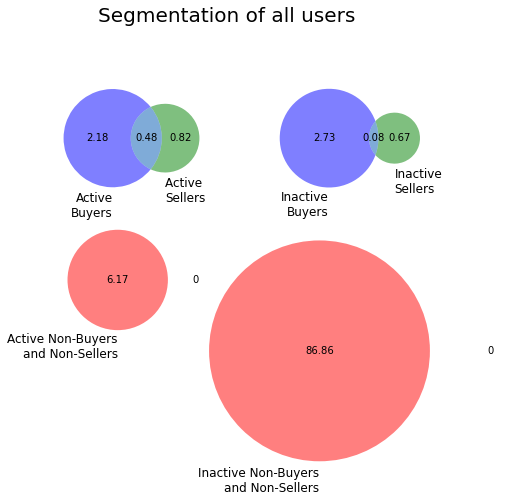

In [14]:
# visualizing the pivot table above through venn diagram
fig = plt.figure(figsize=(15,10))
plt.suptitle('Segmentation of all users', fontsize=20)
ax = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(ax[0,1])
venn2(subsets = (2.18,0.82,0.48), set_labels = ('Active\nBuyers', 'Active \nSellers'), set_colors=('b', 'g'), alpha = 0.5);
ax1 = fig.add_subplot(ax[0,2])
venn2(subsets = (2.73,0.67,0.08), set_labels = ('Inactive\nBuyers', 'Inactive\nSellers'), set_colors=('b', 'g'), alpha = 0.5);
ax1 = fig.add_subplot(ax[1,1])
venn2(subsets = (6.17,0,0), set_labels = ('Active Non-Buyers\nand Non-Sellers',''), alpha = 0.5);
ax1 = fig.add_subplot(ax[1:3,1:4])
venn2(subsets = (86.86,0,0), set_labels = ('Inactive Non-Buyers\nand Non-Sellers',''), alpha = 0.5);
plt.show()

Legend for venn diagram:
- Blue = Buyers
- Green = Sellers
- Red = Non-Buyers and Non-Sellers

Majority of users created an account but don't end up buying or selling anything.

In [15]:
# pivot table to view statistics of buyers
buyerPivot = df_final[['activeStatus','buyer']]
buyerPivot = buyerPivot.groupby(['buyer','activeStatus'],as_index=False).size().rename(columns={"size": "# of users"})
buyerPivot['% of users'] = round(buyerPivot['# of users'] / buyerPivot['# of users'].sum() * 100,2)
buyerPivot = buyerPivot[buyerPivot['buyer'] == 1].reset_index().drop(columns=['index'])

boughtPivot = df_final[['activeStatus','buyer','productsBought']]
boughtPivot = boughtPivot.groupby(['buyer','activeStatus'],as_index=False).agg([np.sum,np.mean])

buyerPivot['productsBought_sum'] = boughtPivot.reset_index().drop([0,1]).reset_index()['productsBought'][['sum']]
buyerPivot['productsBought_mean'] = boughtPivot.reset_index().drop([0,1]).reset_index()['productsBought'][['mean']]
buyerPivot

,buyer,activeStatus,# of users,% of users,productsBought_sum,productsBought_mean
0,1,active,2638,2.67,12602,4.777104
1,1,inactive,2781,2.81,4404,1.583603


Approx 50% of users that made at least 1 purchase have dropped out after 6 months, this might be due to the lack of variety in products and competition since it is a Customer-to-Customer (C2C) online store. Therefore, getting more users to sell on the platform might increase sales. 

In [16]:
# pivot table to view performance of sellers
sellerPivot = df_final[['activeStatus','seller']]
sellerPivot = sellerPivot.groupby(['seller','activeStatus'],as_index=False).size().rename(columns={"size": "# of users"})
sellerPivot['% of users'] = round(sellerPivot['# of users'] / sellerPivot['# of users'].sum() * 100,2)
sellerPivot = sellerPivot[sellerPivot['seller'] == 1].reset_index().drop(columns=['index'])

soldPivot = df_final[['activeStatus','seller','productsSold','productsPassRate']]
soldPivot = soldPivot.groupby(['seller','activeStatus'],as_index=False).agg([np.sum,np.mean])

sellerPivot['productsSold_sum'] = soldPivot.reset_index().drop([0,1]).reset_index()['productsSold'][['sum']]
sellerPivot['productsSold_mean'] = soldPivot.reset_index().drop([0,1]).reset_index()['productsSold'][['mean']]
sellerPivot['productsPassRate_sum'] = soldPivot.reset_index().drop([0,1]).reset_index()['productsPassRate'][['sum']]
sellerPivot['productsPassRate_mean'] = soldPivot.reset_index().drop([0,1]).reset_index()['productsPassRate'][['mean']]
sellerPivot

,seller,activeStatus,# of users,% of users,productsSold_sum,productsSold_mean,productsPassRate_sum,productsPassRate_mean
0,1,active,1289,1.30,10398,8.066718,65314.3,50.670520
1,1,inactive,747,0.76,1629,2.180723,15033.0,20.124498


Average `productsPassRate` being ~50% implies that on average, only 50% of products sold by each seller meets the product description. This could be one of the reasons that new users drop out. A new user could have found a desired product and made a purchase but only to be denied by the platform due to inaccurate product description. Despite protecting the new user from an inaccurate product, this protection does not provide a good user experience for a buyer.

## 2.4 Identifying Relationship between Covariates

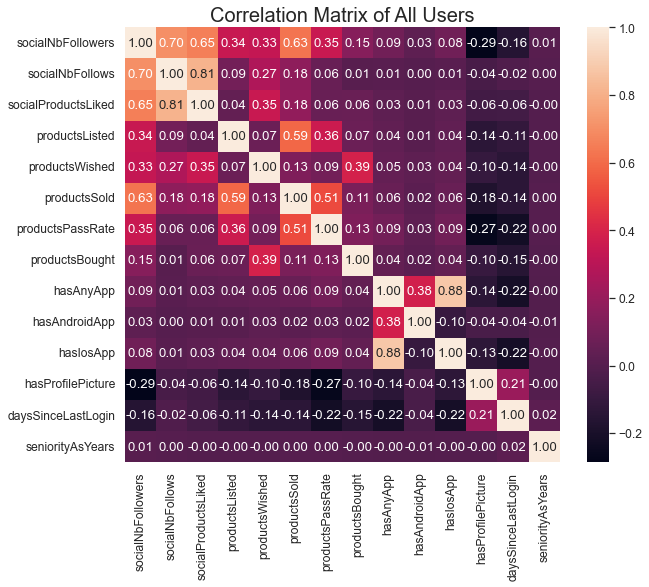

In [17]:
# plot correlation matrix
FIG = plt.figure(figsize=(10,8))
sns.set(font_scale=1.1)
sns.heatmap(df_clean.corr(), annot=True, square=True,fmt='.2f')
plt.title(f'Correlation Matrix of All Users', fontsize=20)
plt.yticks(rotation=0)
plt.show()

Observations:
1. `daysSinceLastLogin` is slightly negatively correlated to everything, which means that the more often a user logs in, there is higher chance that the user will have good engagement with the website.
2. `hasProfilePicture` showing slightly negative correlation is useless information because majority of users have used a profile picture.
3. Some variables are close to 0 and can be excluded from the correlation matrix to simplify the plot.

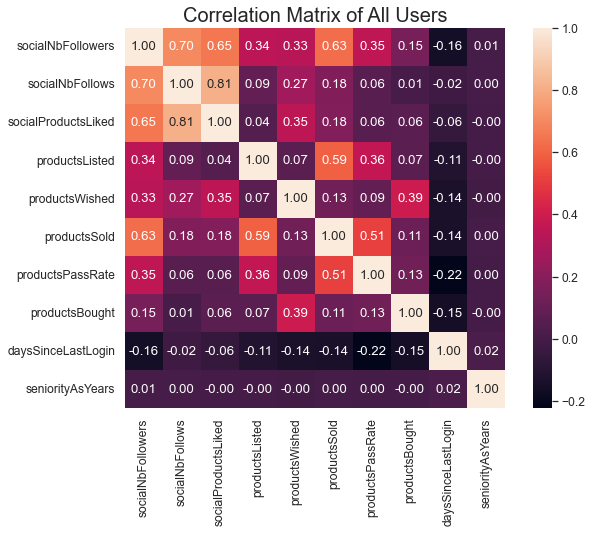

In [18]:
# remove variables with correlation close to 0 and replot correlation matrix
corrMatrixDf = df_clean.drop(columns=['hasAnyApp', 'hasAndroidApp', 'hasIosApp','hasProfilePicture'])

FIG = plt.figure(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(corrMatrixDf.corr(), annot=True, square=True,fmt='.2f')
plt.title(f'Correlation Matrix of All Users', fontsize=20)
plt.yticks(rotation=0)
plt.show()

Insights from the correlation matrix above:

**Buyers**
- `productsBought` and `productsWished` = 0.39
- `productsBought` and `productsLiked` = 0.06

The wishlist and product like features seem to be treated differently by users, these variables could help in understanding user preferences and potentially crucial in building a recommender system that suggests products more appropriately. 

**Sellers**
- `productsSold` and `socialNbFollowers` = 0.63
- `productsSold` and `productsListed` = 0.59

This shows that sellers with more products listed and have more users following their stores are more likely to have higher sales.

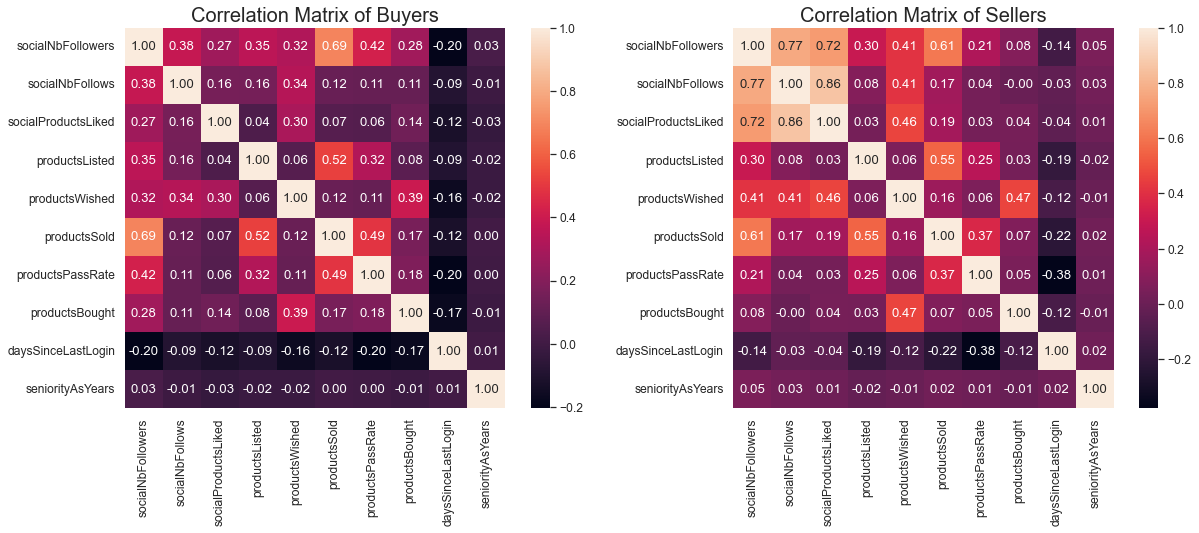

In [19]:
# create df of each segment to explore relationships
buyersDf = df_final[df_final['buyer'] == 1].drop(columns=['buyer','seller', 'buyerAndSeller', 'notBuyerAndSeller', 'activeStatus','hasAnyApp', 'hasAndroidApp', 'hasIosApp','hasProfilePicture'])
sellersDf = df_final[df_final['seller'] == 1].drop(columns=['buyer','seller', 'buyerAndSeller', 'notBuyerAndSeller', 'activeStatus','hasAnyApp', 'hasAndroidApp', 'hasIosApp','hasProfilePicture'])

# compare the relationship of variables between buyers and sellers
FIG = plt.figure(figsize=(20,7))
FIG.add_subplot(121)
sns.set(font_scale=1.1)
sns.heatmap(buyersDf.corr(), annot=True, square=True,fmt='.2f')
plt.title(f'Correlation Matrix of Buyers', fontsize=20)
plt.yticks(rotation=0)

FIG.add_subplot(122)
sns.set(font_scale=1.1)
sns.heatmap(sellersDf.corr(), annot=True, square=True,fmt='.2f')
plt.title(f'Correlation Matrix of Sellers', fontsize=20)
plt.yticks(rotation=0)

plt.show()

Insights from the correlation matrix above:

**Buyers**
- `productsBought` and `socialNbFollows` = 0.11

Despite `productsSold` and `socialNbFollowers` being positively correlated, it is not the case for the opposites of `productsSold` and `socialNbFollowers`. No correlation between `productsBought` and `socialNbFollows` makes sense because buyers realistically would not buy items from all the stores they follow because:
1. Not all products will be a perfect match to the buyers' needs or preference.
2. Not all buyers will have the spending power to meet their desires.

# 3. Summary

## 3.1 - Insight 1

Average `productsPassRate` being ~50% implies that on average, only 50% of products sold by each seller meets the product description. This could be one of the reasons that new users drop out. A new user could have found a desired product and made a purchase but only to be denied by the platform due to inaccurate product description. Despite protecting the new user from an inaccurate product, this protection does not provide a good user experience for a buyer.

In [20]:
# pivot table to view performance of sellers
sellerPivot

,seller,activeStatus,# of users,% of users,productsSold_sum,productsSold_mean,productsPassRate_sum,productsPassRate_mean
0,1,active,1289,1.30,10398,8.066718,65314.3,50.670520
1,1,inactive,747,0.76,1629,2.180723,15033.0,20.124498


## 3.2 - Insight 2

More than 80% of users have created accounts but they did not buy or sell on the platfrom. This implies that the website is receiving high volumes of traffic and engagement but not successfully converting the users into buyers or sellers. Therefore, attention is needed on customer retention.

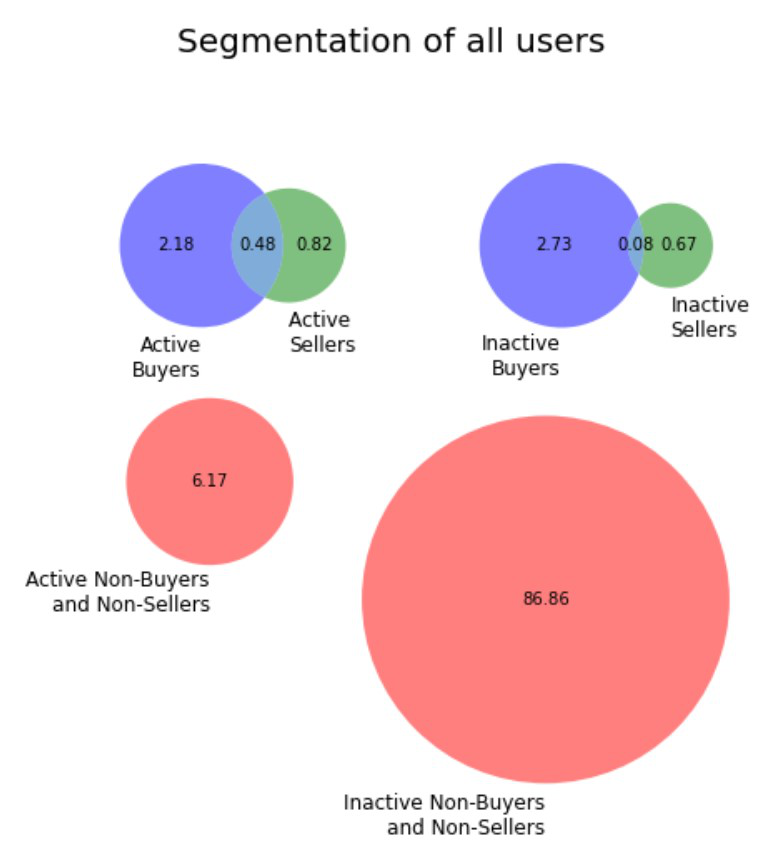

In [21]:
Image.open('user_segmentation.jpg')

## 3.3 - Insight 3

`productsBought` and `socialNbFollows` = 0.11

Despite `productsSold` and `socialNbFollowers` being positively correlated, it is not the case for the opposites of `productsSold` and `socialNbFollowers`. No correlation between `productsBought` and `socialNbFollows` makes sense because buyers realistically would not buy items from all the stores they follow because:
1. Not all products will be a perfect match to the buyers' needs or preference.
2. Not all buyers will have the spending power to meet their desires.

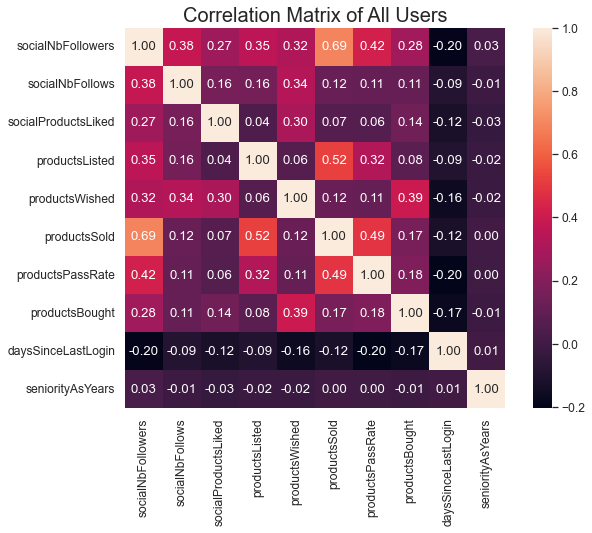

In [22]:
FIG = plt.figure(figsize=(10,7))
sns.set(font_scale=1.1)
sns.heatmap(buyersDf.corr(), annot=True, square=True,fmt='.2f')
plt.title(f'Correlation Matrix of All Users', fontsize=20)
plt.yticks(rotation=0)
plt.show()

## 3.4 Actionable Recommendation

Recommendations:
1. Instead of checking the product description before shipping to the buyer, it is better to carry out the product description verification process when sellers upload the products to their stores. This would significantly alter the user experience in a positive manner.
2. Introduce seller tiering by building a scoring system including but not limited to `productsPassRate`, `poductsSold` and `socialNbFollowers`. This would give buyers the confidence when browsing items from top sellers and allow sellers to track the quality of their products and service. Other metrics to consider for the scoring system would be chat response and % of orders fulfilled by seller. 
3. Provide visual seals / badges of approval on products to give assurance to buyers that the product is accurate and legitimate. Moreover, this would improve the general quality of products listed on the website.